# Ploting different new features

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import ta

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_208\3135227547.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [4]:
# Load data
df = pd.read_csv('../test/data/datas.csv', sep=',')
df = ta.utils.dropna(df)

In [5]:
df.shape

(46306, 8)

In [6]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1315918800,5.80,6.00,5.80,6.00,25.000000,149.190000,5.967600
1,1315922400,5.95,5.95,5.76,5.76,22.353982,132.041023,5.906823
2,1315926000,5.65,5.65,5.65,5.65,2.542000,14.362300,5.650000
6,1315940400,5.92,5.97,5.92,5.97,8.475400,50.504066,5.958901
18,1315983600,5.58,5.62,5.54,5.62,16.425700,91.537032,5.572793


In [7]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume_BTC", fillna=True)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


In [8]:
df.shape

(46306, 94)

In [9]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency', 'Weighted_Price', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_

# Ploting some volatility features

### Bollinger Bands

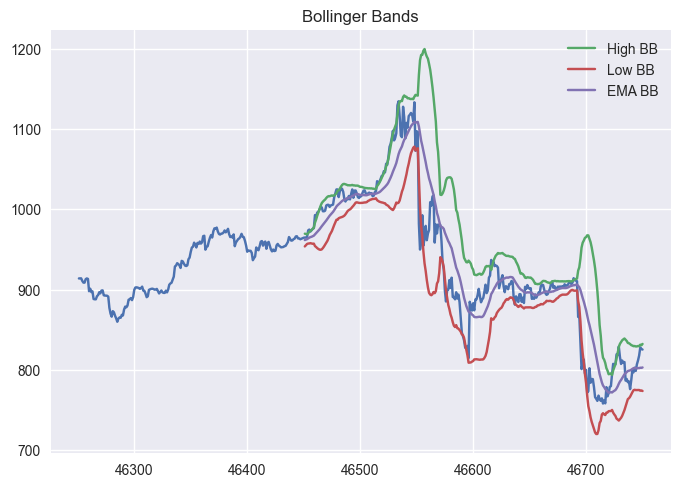

In [10]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40700:41000].volatility_bbh, label='High BB')
plt.plot(df[40700:41000].volatility_bbl, label='Low BB')
plt.plot(df[40700:41000].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### Keltner Channel

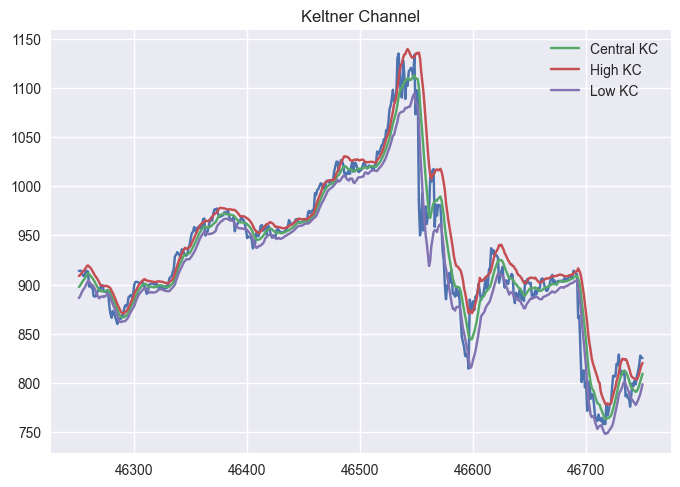

In [12]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_kcc, label='Central KC')
plt.plot(df[40500: 41000].volatility_kch, label='High KC')
plt.plot(df[40500: 41000].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

### Donchian Channel

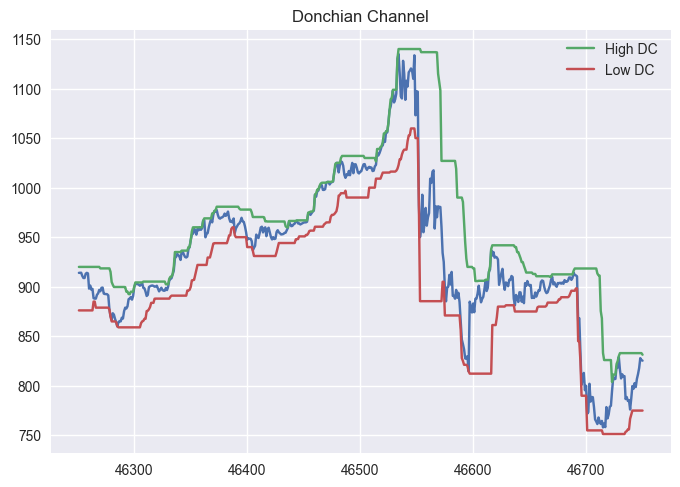

In [13]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_dch, label='High DC')
plt.plot(df[40500: 41000].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

# Ploting trend features

### MACD

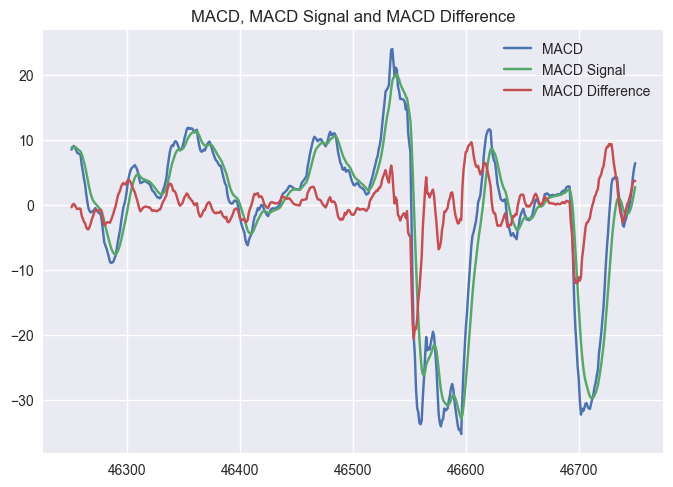

In [14]:
plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

### KST

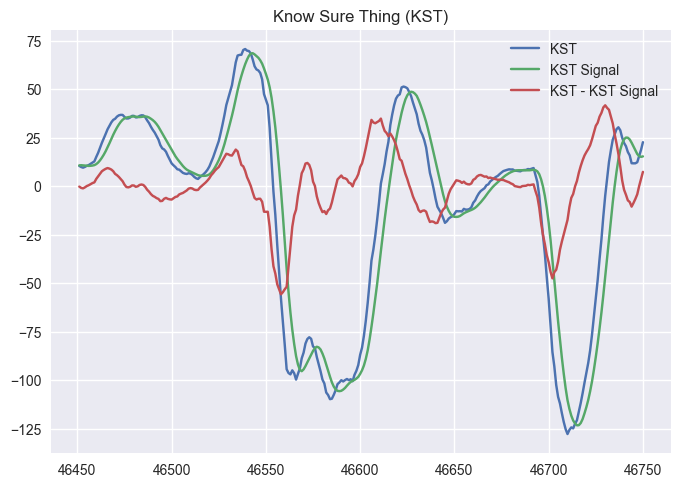

In [15]:
plt.plot(df[40700:41000].trend_kst, label='KST')
plt.plot(df[40700:41000].trend_kst_sig, label='KST Signal')
plt.plot(df[40700:41000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()

### Ichimoku Kinkō Hyō

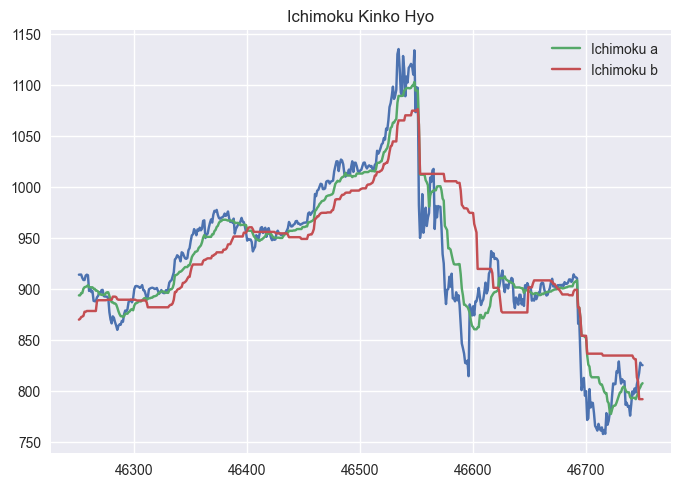

In [16]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40500:41000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[40500:41000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show() 

# Ploting all features

In [ ]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()